In [1]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
import uncertainties.unumpy as unp
from uncertainties.unumpy import (nominal_values as noms, std_devs as stds)
from scipy.optimize import curve_fit
np.random.seed(0)

## Blatt 11

### Aufgabe 32: $\chi^2$-Test
#### a.)

In [2]:
x = [31.6, 32.2, 31.2, 31.9, 31.3, 30.8, 31.3]
err = np.ones(len(x)) * 0.5

messwerte = unp.uarray(x, err)

In [3]:
def chi_square(y, modell):
    return np.sum((noms(y) - modell)**2 / stds(y)**2)

In [4]:
print(f'Chi-Squadrat-Wert des Modells aus a.): {chi_square(messwerte, 31.3)}')

Chi-Squadrat-Wert des Modells aus a.): 6.080000000000007


Für $n = 7$ Freiheitsgerade und einer Signifikanz von 5\% ist der $\chi^2$-Wert mit
14,07 tabelliert. Das bedeutet, dass das gefundene Modell angenommen ist.

---
#### b.)

In [5]:
print(f'Chi-Squadrat-Wert das Modell aus b.): {chi_square(messwerte, 30.7)}')

Chi-Squadrat-Wert das Modell aus b.): 21.920000000000073


Somit ist das Modell für 5\% Signifikanz nicht angenommen.

---
### Aufgabe 33
#### a.)

Gauß-Verteilung:
$$
\begin{aligned}
F_{\mu,\sigma}(x) &= \frac{1}{\sqrt{2\pi\sigma^2}}\cdot\exp{\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)}
\end{aligned}
$$

Poisson-Verteilung:
$$
\begin{aligned}
F_{\lambda }(k) &= \frac {\lambda ^{k}}{k!}\cdot \exp{(-\lambda)}
\end{aligned}
$$

Die Varianz einer Poisson-Verteilung ist ihr Erwartungswert $\sigma = \lambda$.
Somit müssen die Parameter der Gauß-Verteilung folgendermaßen gewählt werden:

$$
\begin{aligned}
\sigma &= \sqrt{\lambda}\\
\mu &= \lambda
\end{aligned}
$$

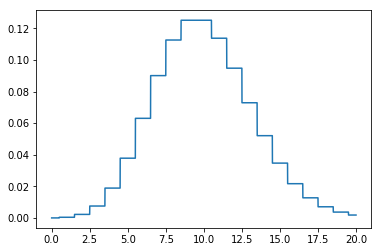

In [6]:
l = 10
def poisson(x):
    return l**x / np.math.factorial(x) * np.exp(-l)
x = np.linspace(0, 20, 5000)
plt.plot(x, [poisson(np.round(n)) for n in x])
plt.show()

---
#### b.)

In [7]:
def k_s_test(test_statistik_1, test_statistik_2):
    return max(np.abs(np.cumsum(test_statistik_1) - np.cumsum(test_statistik_2)))

---
#### c.)

In [8]:
def gauß_poisson(lambda_, n):
    return np.round(np.random.normal(lambda_, np.sqrt(lambda_), n)), np.random.poisson(lambda_, n)

In [9]:
def when_gausian_equals_poisson(alpha, len_test_arrays, iteration_steps):
    K_alpha = np.sqrt(np.log(2 / alpha) / 2)
    for lambda_ in np.arange(iteration_steps) + 1:
        gauß, poisson = gauß_poisson(lambda_, len_test_arrays)
        gauß, bin_edge_gauß = np.histogram(gauß, bins=np.linspace(lambda_ - 5 * lambda_, lambda_ + 5 * lambda_, 101), density=True)
        poisson, bin_edge_poisson = np.histogram(poisson, bins=np.linspace(lambda_ - 5 * lambda_, lambda_ + 5 * lambda_, 101), density=True)
        d_max = k_s_test(gauß, poisson)
        if np.sqrt(len_test_arrays / 2) * d_max < K_alpha:
            print(f'alpha = {alpha}:\n\nErwartungswert = {lambda_}\n\nd_max = {d_max}')
            plt.title(f'lambda = {lambda_}')
            plt.plot(np.cumsum(gauß), color='C0', label='Kumulierter Gauß')
            plt.plot(np.cumsum(poisson), color='C1', label='Kumulierter Poisson')
            plt.legend()
            plt.show()
            break

alpha = 0.05:

Erwartungswert = 11

d_max = 0.018181818181818174


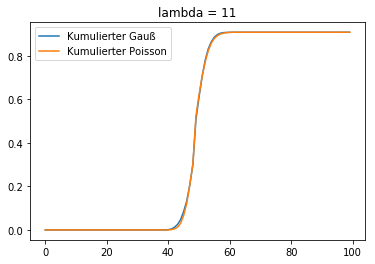

In [10]:
when_gausian_equals_poisson(alpha=0.05, len_test_arrays=10000, iteration_steps=1000)

---
#### d.)

alpha = 0.025:

Erwartungswert = 8

d_max = 0.020750000000000025


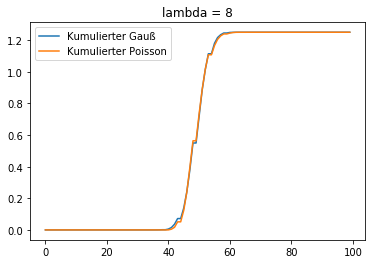

In [11]:
when_gausian_equals_poisson(alpha=0.025, len_test_arrays=10000, iteration_steps=1000)

alpha = 0.01:

Erwartungswert = 13

d_max = 0.009000000000000008


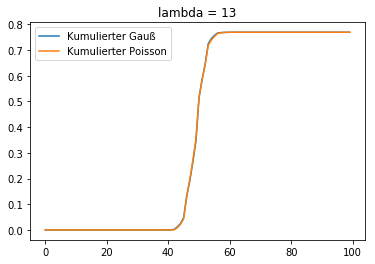

In [12]:
when_gausian_equals_poisson(alpha=0.01, len_test_arrays=10000, iteration_steps=1000)

---
### Aufgabe 34: Ballon-Experiment
#### a.)

In [13]:
tag = np.arange(7) + 1
counts = np.array([4135, 4202, 4203, 4218, 4227, 4231, 4310])
t = 1
zählrate = np.round(counts / t)

Zählrate $\Phi$ ist konstant.
$$N = \Phi\cdot t$$
mit eine konstanten Zeit $t = 1$h.

Die Messung ist Poisson-verteilt.

$$P(x) = \frac{\Phi^x}{x!}\exp{(-\Phi)}$$

Die Likelihood-Funktion hat die Gestalt

$$L = \prod_{i=1}^{n}P(x_i).$$

$$\log{L} = \sum_{i=1}^{n}\left(x_i\log{(\Phi)} -\log{(x_i!)} - \Phi\right)$$

Die Ableitung von $\log{L}$ nach $\Phi$ führt auf

$$\frac{\text{d}\log{L}}{\text{d}\Phi}=\sum_{i=1}^{n}\left(\frac{x_i}{\Phi} - 1\right).$$

Die Maximierung führt auf
$$\Phi = \frac{1}{n}\sum_{i=1}^{n}x_i.$$

Für die gegebene Verteilung der Counts bedeutet das

In [14]:
phi = np.round(np.mean(zählrate))
print(f'Zählrate = {phi:.0f} counts / h')

Zählrate = 4218 counts / h


---
#### b.)

Nehme an, dass die Flussrate linear mit der Zeit ansteigt

$$\Phi(t) = \Gamma\cdot t + b.$$

Aus der Likelihood-Methode folgt

$$
\begin{aligned}
\frac{\text{d}\log{L}}{\text{d}\Gamma} &= \left(\sum_{i=1}^n\frac{x_it_i}{\Gamma t_i + b} - t_i\right)\\
\frac{\text{d}\log{L}}{\text{d}b} &= \left(\sum_{i=1}^n\frac{x_i}{\Gamma t_i + b} - 1\right).
\end{aligned}
$$

$$
\log{L} = \sum_{i=1}^{n}\left(x_i\log{(\Gamma\cdot t + b)} -\log{(x_i!)} - (\Gamma\cdot t + b)\right)
$$

In [15]:
from scipy.optimize import minimize

log_likelihood_gamma_b = lambda x: - np.sum(counts * np.log(x[0] * tag + x[1]) - (x[0] * tag + x[1]))

bnds = ((15, 40), (4000, 4500))

gamma, b = minimize(log_likelihood_gamma_b, x0=[20, 4000], bounds=bnds).x

print(f'Die Parameter, welche die Likelihood-Funktion maximieren lauten Gamma = {gamma:.0f} und b = {b:.0f}.')

Die Parameter, welche die Likelihood-Funktion maximieren lauten Gamma = 23 und b = 4127.


---

Zum Vergleichen wird ein linearer Fit gemacht.

In [16]:
def lin(t, m, b):
    return t * m + b

In [17]:
params, covariance = curve_fit(lin, tag, counts)

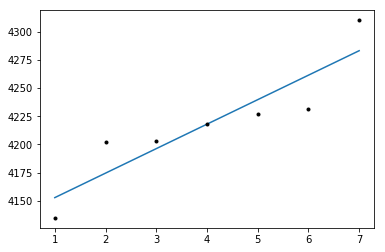

Für Gamma ergibt sich über einen linearen Fit der Wert 22, b = 4131


In [18]:
plt.plot(tag, lin(tag, *params))
plt.plot(tag, counts, 'k.')
plt.show()
print(f'Für Gamma ergibt sich über einen linearen Fit der Wert {params[0]:.0f}, b = {params[1]:.0f}')

Der Fit führt auf die nahezu gleiche Parameter wie die Maximierung der Likelihood-Funktion.

---
#### c.)

Die Likelihood-Funktionen werden durch einander geteilt.


$$
\begin{aligned}
L_{\Phi} &= \prod_{i=1}^{n}\frac{\Phi^{x_i}}{x_i!}\exp{(-\Phi)}\\
L_{\Gamma\cdot t_i + b} &= \prod_{i=1}^{n}\frac{(\Gamma\cdot t_i + b)^{x_i}}{x_i!}\exp{(-(\Gamma\cdot t_i + b))}\\
\frac{L_{\Phi}}{L_{\Gamma\cdot t_i + b}} &= \prod_{i=1}^{n}\frac{\Phi^{x_i}}{(\Gamma\cdot t_i + b)^{x_i}}\exp{(\Gamma\cdot t_i + b - \Phi)}
\end{aligned}
$$

Mit dem Wilks Theorem folgt

$$
-2\log{\left(\frac{L_{\Phi}}{L_{\Gamma\cdot t_i + b}}\right)} = -2 \sum_{i=1}^n\left(x_i\log{\Phi} - x_i\log{(\Gamma\cdot t_i + b)}  + \Gamma\cdot t_i + b - \Phi\right)
$$

In [19]:
quotient_wilks = lambda x: -2 * np.sum(counts * np.log(x[0]) - counts * np.log(x[1] * tag + x[2]) + x[1] * tag + x[2] - x[0])

print(f'Likelihood_quotient = {quotient_wilks([phi, gamma, b])}')

Likelihood_quotient = 3.1103823054254462


Die Anzahl der Freiheitsgrade ist die Differenz der Dimensionalität des $L_{\Phi}$-
und des $L_{\Gamma t_i + b}$-Raums.

Bei $df = 1$ Freiheitsgeraden entspricht der gefundene Likelihood-Quotient, der nach dem Wilks-Theorem $\chi^2$-verteit ist einer Signifikanz von $\alpha = 0,05$.

---
#### d.)

In [20]:
tag = np.append(np.arange(7) + 1, 14)
counts = np.array([4135, 4202, 4203, 4218, 4227, 4231, 4310, 4402])

In [21]:
phi = np.round(np.mean(counts))
print(f'Konstante Zählrate: {phi}')

Konstante Zählrate: 4241.0


In [22]:
bnds = ((15, 40), (4000, 4500))

gamma, b = minimize(log_likelihood_gamma_b, x0=[20, 4000], bounds=bnds).x

print(f'Die Parameter, welche die Likelihood-Funktion maximieren lauten Gamma = {gamma:.0f} und b = {b:.0f}.')

Die Parameter, welche die Likelihood-Funktion maximieren lauten Gamma = 19 und b = 4142.


In [23]:
print(f'Likelihood_quotient = {quotient_wilks([phi, gamma, b])}')

Likelihood_quotient = 9.973057380500904


Bei $df = 1$ Freiheitsgeraden entspricht der gefundene Likelihood-Quotient, der nach dem Wilks-Theorem $\chi^2$-verteit ist einer Signifikanz von $\alpha = 0,001$.